In [1]:
!pip install opencv-python


In [77]:
from  PIL import Image
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## **CV2 face detection**
convert it to grayscale and detect the face

In [37]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [49]:
img = cv2.imread('trump.jpg')

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [51]:
faces = face_cascade.detectMultiScale(gray)

In [52]:
faces

array([[151,  61, 123, 123]], dtype=int32)

In [53]:
from PIL import ImageDraw

In [54]:
pil_img = Image.fromarray(gray, mode='L')

In [55]:
drawing = ImageDraw.Draw(pil_img)

In [56]:
rec = faces.tolist()[0]

In [57]:
rec

[151, 61, 123, 123]

In [58]:
# cv2 return coord - (x, y, w, h)    PIL require (x1,y1, x2, y2)
drawing.rectangle((rec[0], rec[1], rec[0]+rec[2], rec[1]+rec[3]), outline='white')

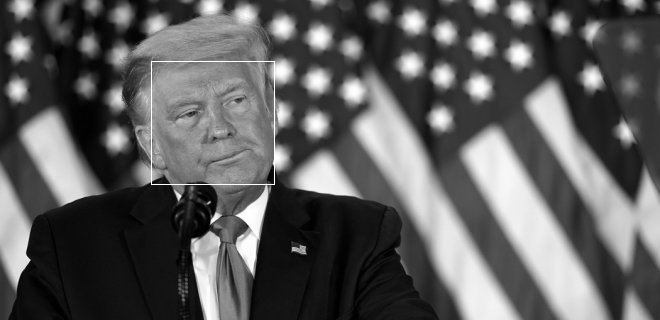

In [59]:
display(pil_img)

### **Basic operations with opencv**

Color image loaded by OpenCV is in BGR mode. But Matplotlib displays in RGB mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV.

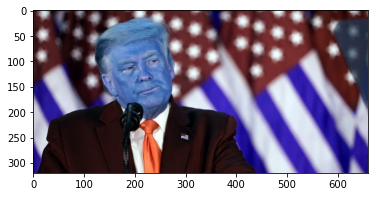

In [75]:
# load an image
img = cv2.imread('trump.jpg')
plt.imshow(img)

In [63]:
# channels: Blue, Green, Red
img.shape

(320, 660, 3)

In [64]:
img.item(10,10,2)

88

In [65]:
# chnage the pixel 10,10,2 on 100
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [66]:
# total number of pixels
img.size

633600

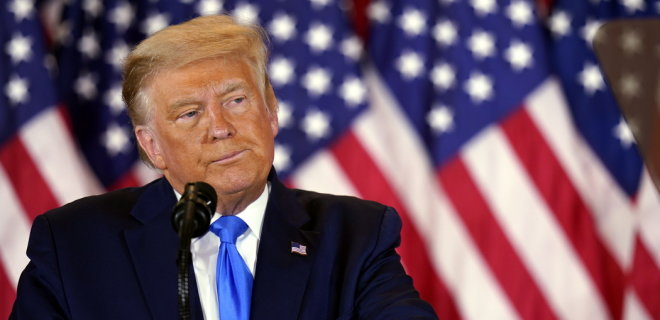

In [78]:
cv2_imshow(img)

Scaling

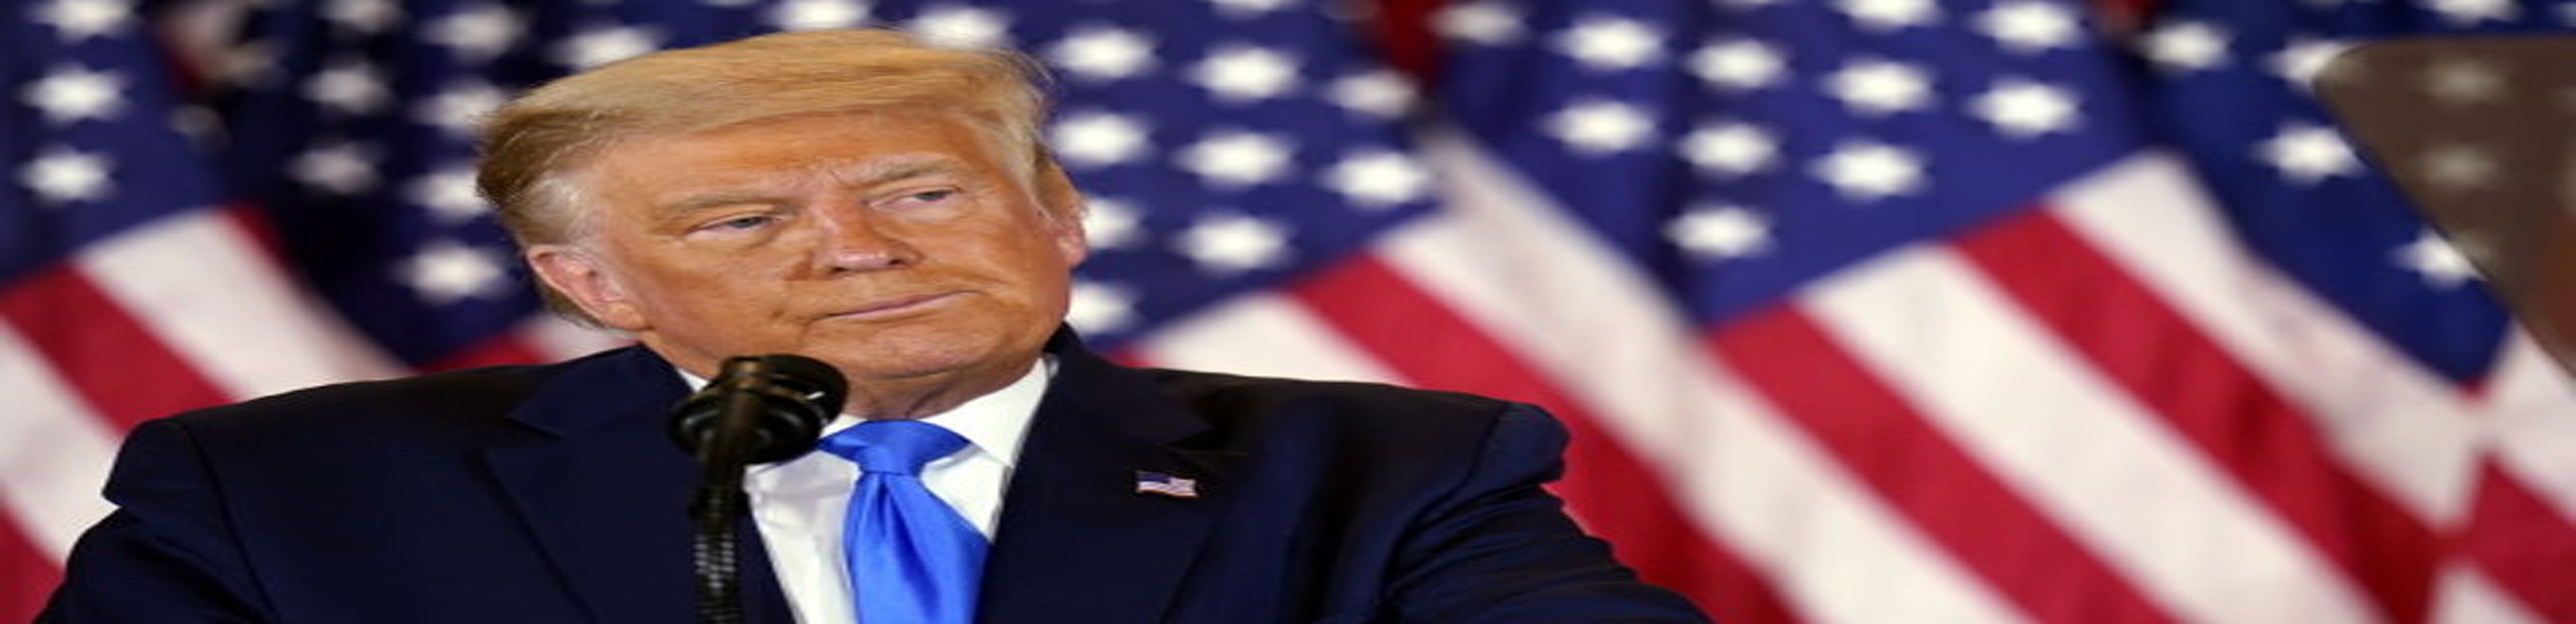

In [81]:
res = cv2.resize(img,None,fx=4, fy=2, interpolation = cv2.INTER_CUBIC)
cv2_imshow(res)

In [86]:
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

Rotation

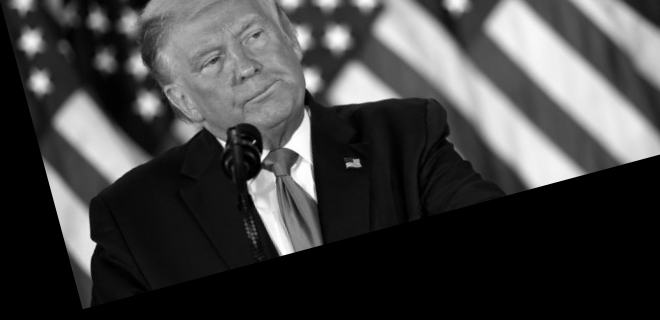

In [104]:
img = cv2.imread('trump.jpg',0)  # read 2D image 
rows,cols = img.shape
M = cv2.getRotationMatrix2D((rows/2,cols/2),15,1)  # (rows/2,cols/2) -- axis of the rotation (point) 15-deg, 1-zoom
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)

### Load image for plt (RGB)

In [105]:
def read_image(path):
    im = cv2.imread(str(path))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

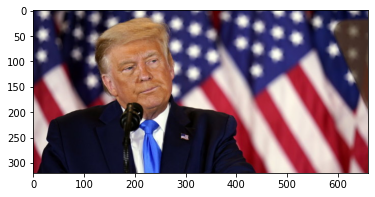

In [106]:
img = read_image('trump.jpg')
plt.imshow(img) # normal colors, image is loaded as RGB

### Cropping an image

In [107]:
def center_crop(im, crop_pixels = 50):
    return im[crop_pixels:im.shape[0] - crop_pixels, crop_pixels:im.shape[1] - crop_pixels]

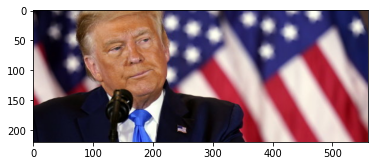

In [108]:
plt.imshow(center_crop(img))

### Random Crop

In [109]:
def random_crop(im, row_crop_pix = 20):
    rows, cols, _ = im.shape
    cols_crop_pix = round(row_crop_pix*cols/rows)
    row_crop_pix = int(np.floor(2*random.uniform(0, 1)*row_crop_pix))
    cols_crop_pix = int(np.floor(2*random.uniform(0, 1)*cols_crop_pix).astype(int))
    return im[row_crop_pix:rows - row_crop_pix, cols_crop_pix:cols - cols_crop_pix]

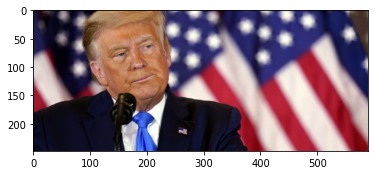

In [113]:
plt.imshow(random_crop(img))

### Resizing

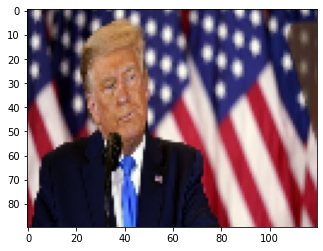

In [117]:
resized = cv2.resize(img, (120,90))
plt.imshow(resized)

### Flip image

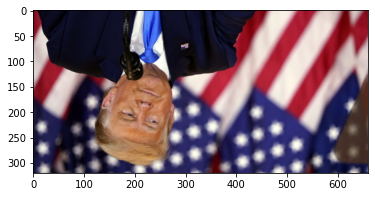

In [118]:
flip_v = np.flip(img,0)
plt.imshow(flip_v)

### Rotate image

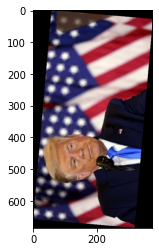

In [120]:
from scipy import ndimage
rotated = ndimage.rotate(img, 85)
plt.imshow(rotated)

### Affine transformation with border filling


In [121]:
def affine_img(img, angle):
    rows, columns, _ = img.shape
    M = cv2.getRotationMatrix2D((rows/2,columns/2),angle,1) #Calculates an affine matrix of 2D rotation.
    return cv2.warpAffine(img,M,(columns,rows), borderMode=cv2.BORDER_REFLECT, 
                          flags=cv2.INTER_NEAREST)

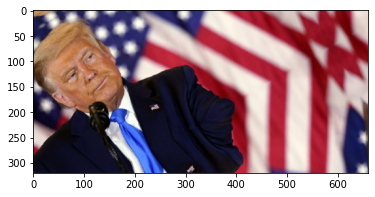

In [122]:
rotated = affine_img(img, 30)
plt.imshow(rotated)

### Change Brightness and Contrast

In [123]:
def bright_contrast_loop (image, alpha=1, beta=0):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    return new_image

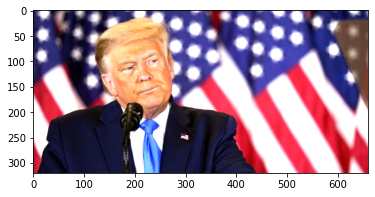

In [124]:
contrast_im = bright_contrast_loop(img,alpha=1.5)
plt.imshow(contrast_im)

In [125]:
# var 2
def bright_contrast (image, alpha=1, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

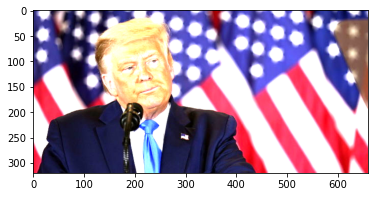

In [126]:
contrast_im = bright_contrast(img, alpha=2)
plt.imshow(contrast_im)

### Bounding Box

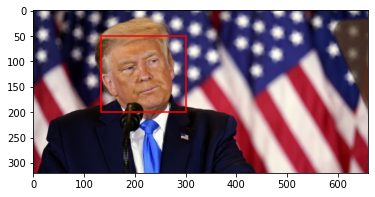

In [130]:
import matplotlib.patches as patches

xmin = 133
ymin= 50
xmax = 300
ymax = 200

fig,ax = plt.subplots(1)
ax.imshow(img)
#make rectangular bounding box
bb = patches.Rectangle(xy=(xmin,ymin),width=xmax-xmin,height=ymax-ymin,linewidth=1.5,edgecolor='r',facecolor='none')
ax.add_patch(bb) #add bounding box to image
plt.show()